In [1]:
import scipy.io
#import matplotlib.pyplot as plt
import numpy as np

from linearRegCostFunction import linearRegCostFunction
from trainLinearReg import trainLinearReg
from learningCurve import learningCurve
from polyFeatures import polyFeatures
from featureNormalize import featureNormalize
from plotFit import plotFit
from validationCurve import validationCurve

#from matplotlib import use
#use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline

# automatic reload of imported packages 
%load_ext autoreload
%autoreload 2

## Machine Learning Online Class
#  Exercise 5 | Regularized Linear Regression and Bias-Variance
#
#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  exercise. You will need to complete the following functions:
#
#     linearRegCostFunction.m
#     learningCurve.m
#     validationCurve.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#


Loading and Visualizing Data ...


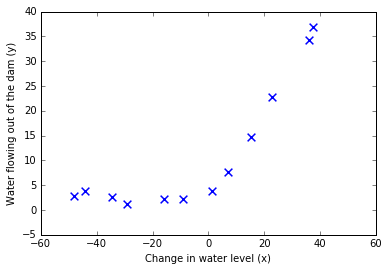

In [2]:
## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.
#

# Load Training Data
print 'Loading and Visualizing Data ...'

# Load from ex5data1: 
# You will have X, y, Xval, yval, Xtest, ytest in your environment
data = scipy.io.loadmat('ex5data1.mat')

# m = Number of examples
X = data['X'][:, 0]
y = data['y'][:, 0]
Xval = data['Xval'][:, 0]
yval = data['yval'][:, 0]
Xtest = data['Xtest'][:, 0]

m = X.size

# Plot training data
plt.scatter(X, y, marker='x', s=60, edgecolor='r', lw=1.5)
plt.ylabel('Water flowing out of the dam (y)')            # Set the y-axis label
plt.xlabel('Change in water level (x)')     # Set the x-axis label

#raw_input("Program paused. Press Enter to continue...")


In [3]:
## =========== Part 2: Regularized Linear Regression Cost =============
#  You should now implement the cost function for regularized linear 
#  regression. 
#

theta = np.array([1, 1])
J = linearRegCostFunction(np.column_stack((np.ones(m), X)), y, theta, 1)[0]

print 'Cost at theta = [1  1]: %f \n(this value should be about 303.993192)\n' % J

#raw_input("Program paused. Press Enter to continue...") 


Cost at theta = [1  1]: 303.993192 
(this value should be about 303.993192)



In [4]:
## =========== Part 3: Regularized Linear Regression Gradient =============
#  You should now implement the gradient for regularized linear 
#  regression.
#

theta = np.array([1, 1])
J, grad = linearRegCostFunction(np.column_stack((np.ones(m), X)), y, theta, 1)

print 'Gradient at theta = [1  1]:  [%f %f] \n(this value should be about [-15.303016 598.250744])\n' %(grad[0], grad[1])

#raw_input("Program paused. Press Enter to continue...") 


Gradient at theta = [1  1]:  [-15.303016 598.250744] 
(this value should be about [-15.303016 598.250744])



Optimization terminated successfully.
         Current function value: 22.379542
         Iterations: 3
         Function evaluations: 28
         Gradient evaluations: 7


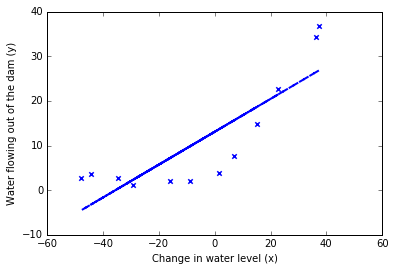

In [5]:
## =========== Part 4: Train Linear Regression =============
#  Once you have implemented the cost and gradient correctly, the
#  trainLinearReg function will use your cost function to train 
#  regularized linear regression.
# 
#  Write Up Note: The data is non-linear, so this will not give a great 
#                 fit.
#

#  Train linear regression with Lambda = 0
Lambda = 0
theta = trainLinearReg(np.column_stack((np.ones(m), X)), y, 1)

#  Plot fit over the data
plt.scatter(X, y, marker='x', s=20, edgecolor='r', lw=1.5)
plt.ylabel('Water flowing out of the dam (y)')            # Set the y-axis label
plt.xlabel('Change in water level (x)')     # Set the x-axis label
plt.plot(X, np.column_stack((np.ones(m), X)).dot(theta), '--', lw=2.0)

#raw_input("Program paused. Press Enter to continue...") 


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 12
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 24
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 60
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 17
         Function evaluations: 112
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 17
         Function evaluations: 112
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 17
         Function evaluations: 112
  

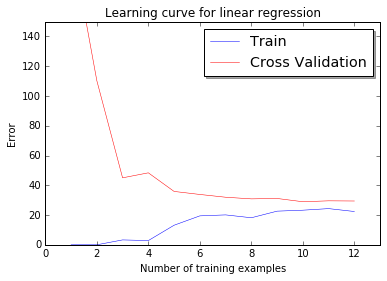

In [6]:
## =========== Part 5: Learning Curve for Linear Regression =============
#  Next, you should implement the learningCurve function. 
#
#  Write Up Note: Since the model is underfitting the data, we expect to
#                 see a graph with "high bias" -- slide 8 in ML-advice.pdf 
#

Lambda = 0
error_train, error_val = learningCurve(np.column_stack((np.ones(m), X)), y,
                                       np.column_stack((np.ones(Xval.shape[0]), Xval)), yval, Lambda)
plt.figure()
plt.plot(range(1, m+1), error_train, color='b', lw=0.5, label='Train')
plt.plot(range(1, m+1), error_val, color='r', lw=0.5, label='Cross Validation')
plt.title('Learning curve for linear regression')
plt.legend()
plt.xlabel('Number of training examples')
plt.ylabel('Error')

plt.xlim(0, 13)
plt.ylim(0, 150)
plt.legend(loc='upper right', shadow=True, fontsize='x-large', numpoints=1)

print 'Training Examples\tTrain Error\tCross Validation Error'
for i in range(m):
    print '  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i])

#raw_input("Program paused. Press Enter to continue...") 


In [7]:
## =========== Part 6: Feature Mapping for Polynomial Regression =============
#  One solution to this is to use polynomial regression. You should now
#  complete polyFeatures to map each example into its powers
#

p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
print X_poly[0, :]
X_poly, mu, sigma = featureNormalize(X_poly)  # Normalize
X_poly = np.column_stack((np.ones(m), X_poly))                   # Add Ones


# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma
X_poly_test = np.column_stack((np.ones(X_poly_test.shape[0]), X_poly_test))        # Add Ones

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.column_stack((np.ones(X_poly_test.shape[0]), X_poly_val))           # Add Ones

print 'Normalized Training Example 1:'
print X_poly[0, :]

print '\nProgram paused. Press enter to continue.'

[ -1.59367581e+01   2.53980260e+02  -4.04762197e+03   6.45059724e+04
  -1.02801608e+06   1.63832436e+07  -2.61095791e+08   4.16102047e+09]
Normalized Training Example 1:
[ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]

Program paused. Press enter to continue.


         Current function value: 0.440326
         Iterations: 10
         Function evaluations: 132
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 33
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 55
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 231
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 41
         Function evaluations: 946
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 77
         Function evaluations: 1617
         Gradient evaluations: 147
    

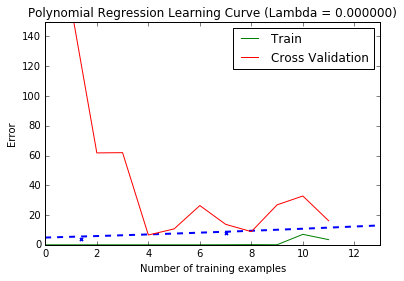

In [8]:
# =========== Part 7: Learning Curve for Polynomial Regression =============
#  Now, you will get to experiment with polynomial regression with multiple
#  values of Lambda. The code below runs polynomial regression with 
#  Lambda = 0. You should try running the code with different values of
#  Lambda to see how the fit and learning curve change.
#

Lambda = 0
theta = trainLinearReg(X_poly, y, Lambda, method='BFGS', maxiter=10)

# Plot training data and fit
plt.figure()
plt.scatter(X, y, marker='x', s=10, edgecolor='r', lw=1.5)

plotFit(min(X), max(X), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)')            # Set the y-axis label
plt.ylabel('Water flowing out of the dam (y)')     # Set the x-axis label
# plt.plot(X, np.column_stack((np.ones(m), X)).dot(theta), marker='_',  lw=2.0)
plt.title('Polynomial Regression Fit (Lambda = %f)' % Lambda)

error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, Lambda)
plt.plot(range(m), error_train, label='Train')
plt.plot(range(m), error_val, label='Cross Validation')
plt.title('Polynomial Regression Learning Curve (Lambda = %f)' % Lambda)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.xlim(0, 13)
plt.ylim(0, 150)
plt.legend()

print 'Polynomial Regression (Lambda = %f)\n\n' % Lambda
print '# Training Examples\tTrain Error\tCross Validation Error'
for i in range(m):
    print '  \t%d\t\t%f\t%f' % (i, error_train[i], error_val[i])

#raw_input("Program paused. Press Enter to continue...") 


         Current function value: 3.469127
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 4
         Current function value: 3.475266
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 4
         Current function value: 3.487532
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 4
         Current function value: 3.530463
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 4
         Current function value: 3.653000
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 4
         Current function value: 4.080484
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 4
         Current function value: 5.289961
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 4
         Current function value: 9.386967
         Iterations: 2
         Fu

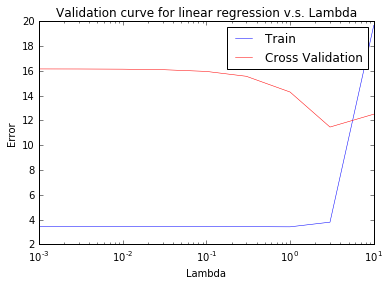

In [13]:
## =========== Part 8: Validation for Selecting Lambda =============
#  You will now implement validationCurve to test various values of 
#  Lambda on a validation set. You will then use this to select the
#  "best" Lambda value.
#

Lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

plt.plot(Lambda_vec, error_train, color='b', lw=0.5, label='Train')
plt.plot(Lambda_vec, error_val, color='r', lw=0.5, label='Cross Validation')
plt.title('Validation curve for linear regression v.s. Lambda')
plt.xscale('log')
plt.legend()

#plt.plot(Lambda_vec, error_train, Lambda_vec, error_val)
#plt.legend('Train', 'Cross Validation')
plt.xlabel('Lambda')
plt.ylabel('Error')

print 'Lambda\t\tTrain Error\tValidation Error'
for i in range(Lambda_vec.size):
    print ' %f\t%f\t%f' % (Lambda_vec[i], error_train[i], error_val[i])

#raw_input("Program paused. Press Enter to continue...") 

[-15.93675813 -29.15297922  36.18954863  37.49218733 -48.05882945
  -8.94145794  15.30779289 -34.70626581   1.38915437 -44.38375985
   7.01350208  22.76274892]
[  3.00644342   2.39573982  34.95852481  37.97357113   7.56447187
   3.86083107  11.19437198   2.68724123   5.92409001   5.20028514
   7.60401264  16.24603284]
         Current function value: 19.995003
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 4


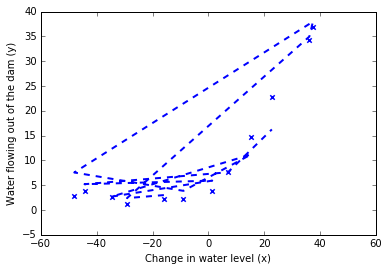

In [22]:
print X
#print X_poly
print X_poly.dot(theta_best)
Lambda_best = 3
theta_best = trainLinearReg(X_poly, y, Lambda_best)
plt.scatter(X, y, marker='x', s=20, edgecolor='r', lw=1.5)
plt.ylabel('Water flowing out of the dam (y)')            # Set the y-axis label
plt.xlabel('Change in water level (x)')     # Set the x-axis label
plt.plot(X, X_poly.dot(theta_best), '--', lw=2.0)